In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier


#### read the datasets

athlete_data = pd.read_csv('athlete_events.csv', names= ["ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"])

NOC_data = pd.read_csv('noc_regions.csv', names= ["NOC","region","notes"])

print(athlete_data.head(50))
print(athlete_data.shape)

print(NOC_data.head(50))
print(NOC_data.shape)



    ID                                Name Sex   Age  Height  Weight  \
0    1                           A Dijiang   M  24.0   180.0    80.0   
1    2                            A Lamusi   M  23.0   170.0    60.0   
2    3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4    5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5    5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6    5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7    5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8    5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
9    5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
10   6                     Per Knut Aaland   M  31.0   188.0    75.0   
11   6                     Per Knut Aaland   M  31.0   188.0    75.0   
12   6                     Per Knut Aaland   M  31.0   188.0    

In [30]:
athlete_data.info()
NOC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


In [31]:
### merge the Olympics and NOC datasets

olympic_data = athlete_data.merge(NOC_data, how = 'left', left_on = 'NOC', right_on = 'NOC')
print(olympic_data)

            ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
9            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
10           6                     Per Knut Aaland   M  31.0   188.0    75.0   
11           6                     Per K

In [32]:

olympic_data.loc[olympic_data['Season']=='Summer'].reset_index()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
5,27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
6,29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
7,31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN,Finland,NaN
8,32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
9,33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN


In [33]:
olympic_data.loc[olympic_data['Season']=='Winter'].reset_index()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
1,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
2,6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
3,7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
4,8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
7,11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
8,12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
9,13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN


In [34]:
### the number of winter sports

print(olympic_data.loc[olympic_data['Season']=='Winter'].Sport.unique())
print(len(olympic_data.loc[olympic_data['Season']=='Winter'].Sport.unique()))

['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']
17


In [35]:
### the number of summer sports

print(olympic_data.loc[olympic_data['Season']=='Summer'].Sport.unique())
print(len(olympic_data.loc[olympic_data['Season']=='Summer'].Sport.unique()))

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']
52


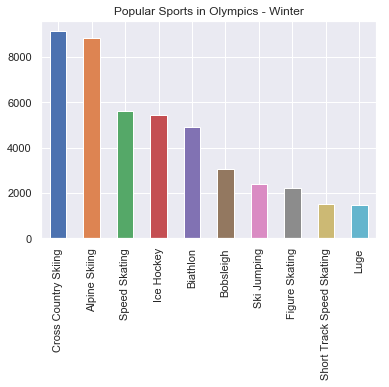

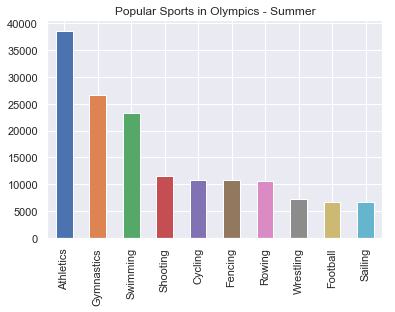

In [36]:
### find the 10 most popular sports in winter olympics

import matplotlib.pyplot as plt

top=olympic_data[olympic_data['Season']=='Winter'].Sport.value_counts().head(n=10)
top.plot(kind='bar')
plt.title('Popular Sports in Olympics - Winter')
plt.show()

### find the 10 most popular sports in summer olympics

tops=olympic_data[olympic_data['Season']=='Summer'].Sport.value_counts().head(n=10)
tops.plot(kind='bar')
plt.title('Popular Sports in Olympics - Summer')
plt.show()

Medal           Bronze   Gold  Silver
region                               
Russia           184.0  379.0   196.0
Canada           107.0  305.0   199.0
Germany          196.0  226.0   208.0
USA              161.0  166.0   308.0
Norway           127.0  151.0   165.0
Sweden           177.0  125.0   126.0
Austria          103.0   79.0    98.0
Switzerland      129.0   76.0    70.0
Finland          215.0   66.0   145.0
Italy             77.0   57.0    57.0
South Korea       10.0   50.0    26.0
Netherlands       42.0   42.0    38.0
UK                31.0   42.0    10.0
France            79.0   36.0    35.0
Czech Republic   109.0   29.0    93.0
Japan             24.0   17.0    22.0
China             34.0   16.0    30.0
India              NaN    7.0     NaN
Poland            11.0    6.0    10.0
Belarus            5.0    6.0     4.0
Australia          7.0    6.0     3.0
Ukraine            5.0    5.0     1.0
Croatia            1.0    4.0     6.0
Estonia            1.0    4.0     2.0
Belgium     

<function matplotlib.pyplot.show(*args, **kw)>

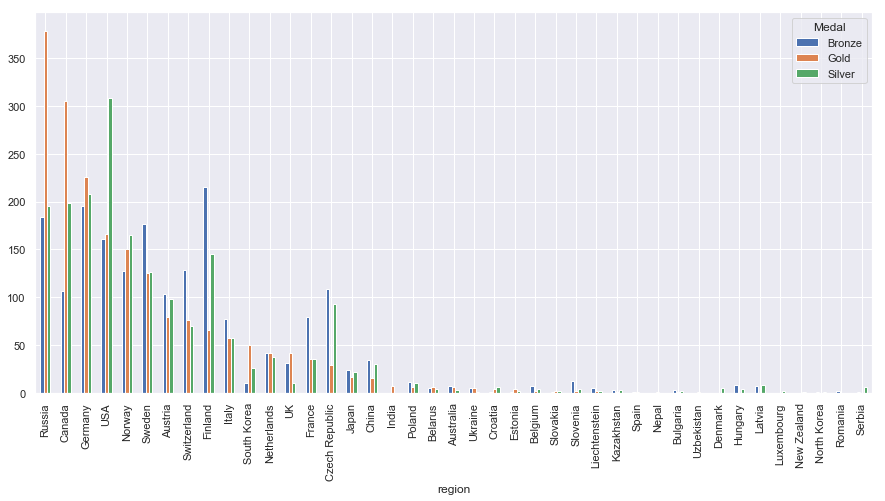

In [37]:
### find the number of gold , silver and bronze medals that are won by each countries in winter olympics

import seaborn as sns
sex_olp = olympic_data[olympic_data['Season']=='Winter'].groupby(['region','Medal'])['ID'].count().reset_index().sort_values(by='Medal',ascending=False)
y= sex_olp.pivot('region','Medal','ID').sort_values(by='Gold',ascending=False).head(50)
print(y)
y.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(15, 7)
plt.show



Medal           Bronze    Gold  Silver
region                                
USA             1197.0  2472.0  1333.0
Russia           994.0  1220.0   974.0
Germany         1064.0  1075.0   987.0
UK               620.0   636.0   729.0
Italy            454.0   518.0   474.0
France           587.0   465.0   575.0
Hungary          363.0   432.0   328.0
Australia        515.0   362.0   456.0
Sweden           358.0   354.0   396.0
China            259.0   335.0   319.0
Netherlands      371.0   245.0   302.0
Japan            333.0   230.0   287.0
Norway           167.0   227.0   196.0
Denmark          177.0   179.0   236.0
South Korea      175.0   171.0   206.0
Cuba             116.0   164.0   129.0
Romania          290.0   161.0   200.0
Canada           344.0   158.0   239.0
Serbia           159.0   157.0   216.0
Finland          217.0   132.0   125.0
India             40.0   131.0    19.0
Poland           242.0   111.0   185.0
Spain            135.0   109.0   243.0
Brazil           191.0   

<function matplotlib.pyplot.show(*args, **kw)>

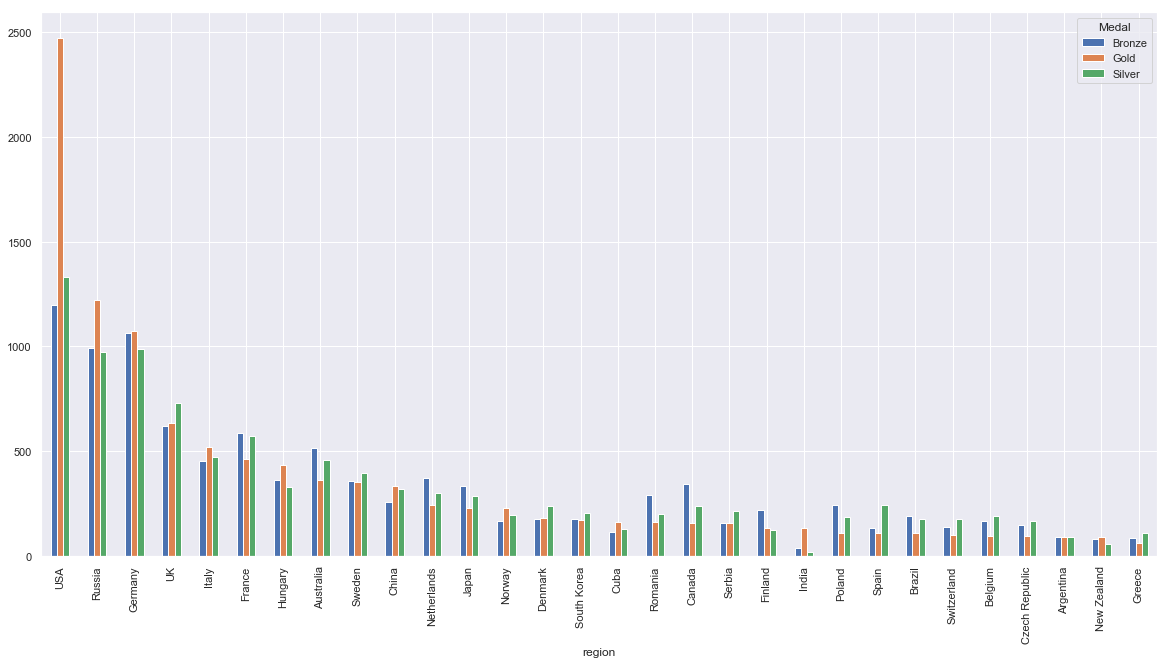

In [38]:
### find the number of gold , silver and bronze medals that are won by each countries in summer olympics


import seaborn as sns
sex_olp = olympic_data[olympic_data['Season']=='Summer'].groupby(['region','Medal'])['ID'].count().reset_index()
y= sex_olp.pivot('region','Medal','ID').sort_values(by='Gold',ascending=False).head(30)
print(y)
y.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.show


Sex        F       M
Year                
1896     NaN   176.0
1900    23.0  1201.0
1904     6.0   644.0
1906     6.0   835.0
1908    44.0  1980.0
1912    53.0  2356.0
1920    78.0  2598.0
1924   169.0  3396.0
1928   340.0  3363.0
1932   222.0  1952.0
1936   441.0  4701.0
1948   523.0  4545.0
1952   629.0  4993.0
1956   516.0  3651.0
1960   757.0  5260.0
1964   880.0  5350.0
1968   994.0  5723.0
1972  1266.0  6856.0
1976  1490.0  5710.0
1980  1358.0  4972.0
1984  1846.0  6221.0
1988  2514.0  7359.0
1992  3210.0  7973.0
1994   522.0  1216.0
1996  3517.0  6822.0
1998   789.0  1390.0
2000  4068.0  6579.0
2002   886.0  1513.0
2004  4300.0  6257.0
2006   955.0  1539.0
2008  4609.0  6290.0
2010  1033.0  1503.0
2012  4654.0  5863.0
2014  1102.0  1643.0
2016  5034.0  6145.0


<function matplotlib.pyplot.show(*args, **kw)>

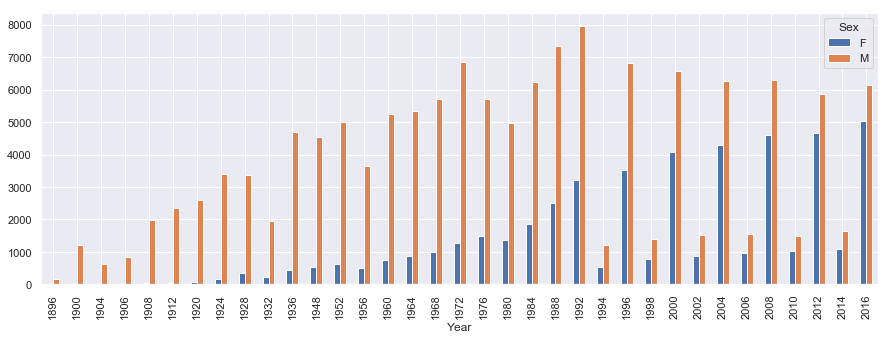

In [39]:
### find the number of males amd females for each year when the olympics are held

import seaborn as sns
sex_olp = olympic_data.groupby(['Year','Sex'])['ID'].nunique().reset_index()
y= sex_olp.pivot('Year','Sex','ID')
print(y)
y.plot(kind='bar')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show

  Sex  Medal
0   F   1811
1   M   3884


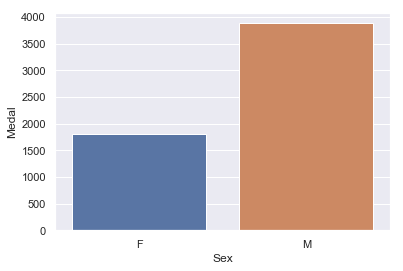

In [40]:
### find the number og medals that are won by the male and female athletes in winter olympics

import seaborn as sns
sns.set(style="darkgrid")
winter_olp = olympic_data[olympic_data['Season']=='Winter'].groupby('Sex')['Medal'].count().reset_index()
print(winter_olp)
ax = sns.barplot(x='Sex' , y='Medal', data=winter_olp)

  Sex  Medal
0   F   9442
1   M  24646


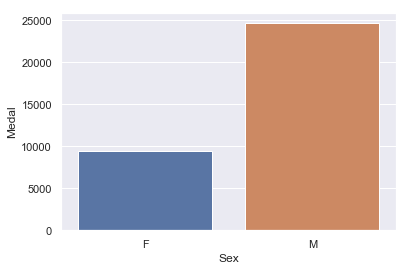

In [41]:
### find the number og medals that are won by the male and female athletes in summer olympics

import seaborn as sns
sns.set(style="darkgrid")
summer_olp = olympic_data[olympic_data['Season']=='Summer'].groupby('Sex')['Medal'].count().reset_index()
print(summer_olp)
ax = sns.barplot(x='Sex' , y='Medal', data=summer_olp)

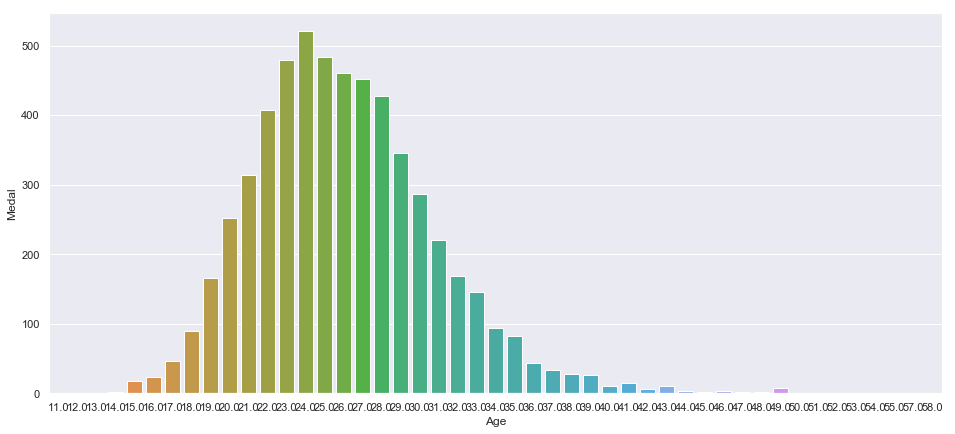

In [42]:
### plot that show the range of athletes age and how many medals are won in winter olympics

import seaborn as sns
plt.figure(figsize=(16, 7))
sns.set(style="darkgrid")
winter_olp = olympic_data[olympic_data['Season']=='Winter'].groupby('Age')['Medal'].count().reset_index()
#print(winter_olp)
ax = sns.barplot(x='Age' , y='Medal', data=winter_olp)

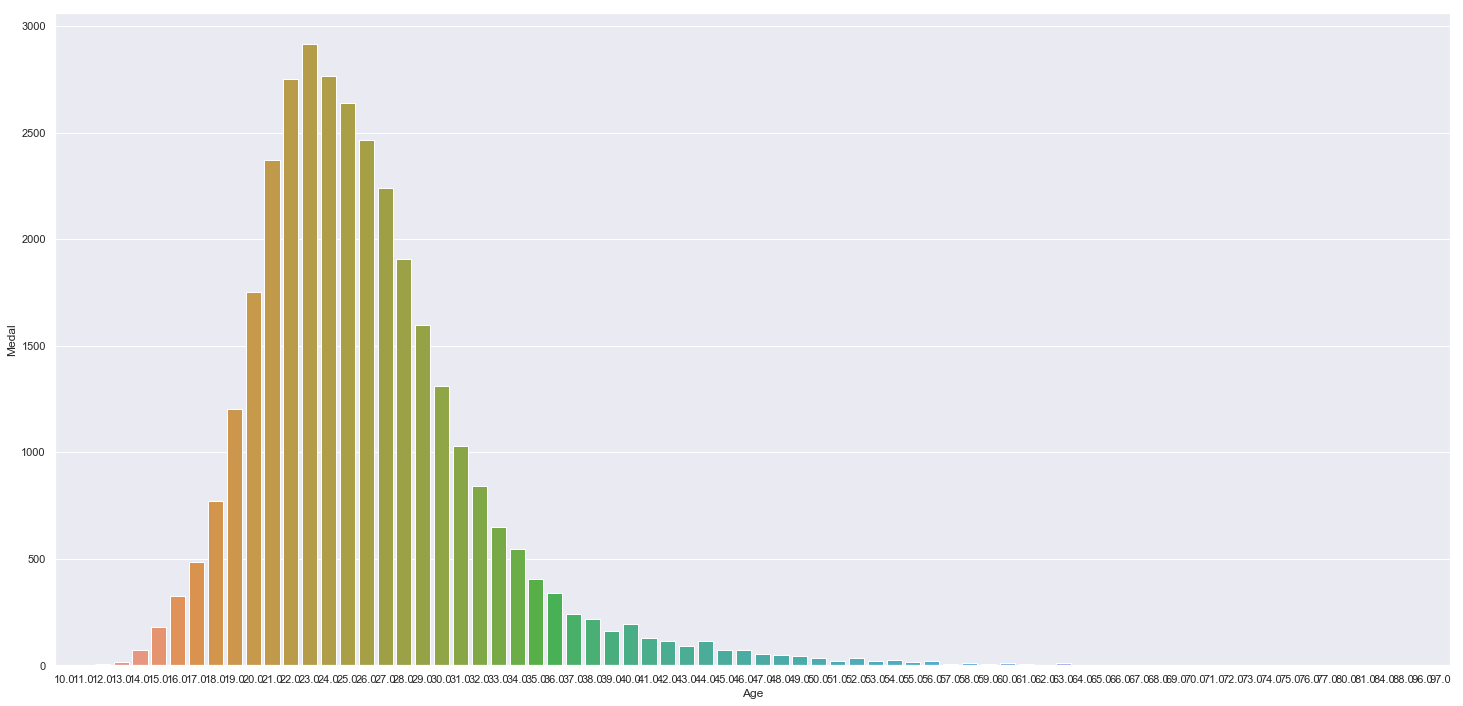

In [43]:
### plot that show the range of athletes age and how many medals are won in summer olympics

import seaborn as sns
plt.figure(figsize=(25, 12))
sns.set(style="darkgrid")
summer_olp = olympic_data[olympic_data['Season']=='Summer'].groupby('Age')['Medal'].count().reset_index()
#print(summer_olp)
ax = sns.barplot(x='Age' , y='Medal', data=summer_olp)